# Validations pour le multicouche
## Porte logique XOR
Commençons par construire le modèle: un modèle 2-2-1 suffit. Intuitivement, on peut se dire que chaque neurone de la couche cachée va apprendre une demi-séparation: "x1 OR x2" et "x1 AND NOT x2". Le neurone de la couche de sortie combinera ces activations pour donner le XOR.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from multilayer.layer import Layer
from multilayer.model import Model
from utils import data_processing

model = Model([
    Layer(units=2, activation="sigmoid", input_size=2),
    Layer(units=1, activation="sigmoid"),
])

On importe le dataset du XOR depuis un fichier *.csv:

In [42]:
training_df = data_processing.load_dataframe_from_file("../datasets/table_4_3.csv")

# Obtain data in the form of
# x_train = np.array([[0,0],[0,1],[1,0],[1,1]],dtype=float)
# y_train = np.array([0,1,1,0],dtype=float)

# x_train = np.stack(training_df["inputs"].to_numpy())[:, 1:].astype(float) is more efficient but less understandable
x_train = np.array([x[1:] for x in training_df["inputs"]], dtype=float)

y_train = training_df["label"].to_numpy(dtype=float)
print(f"x_train =\n {x_train}")
print(f"y_train = {y_train}")

x_train =
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
y_train = [0. 1. 1. 0.]


Il ne reste "plus qu'à" entrainer le modèle en stockant ses données évoluant au fur et à mesure des epochs.

In [43]:
history = model.fit(x_train, y_train, 0.8, 0.001, 2000)

for case in x_train:
    answer = model.forward(case)
    print(f"Case: {case}, answer: {answer.round()}")

Training complete after 1193 epochs.
Case: [0. 0.], answer: [0.]
Case: [0. 1.], answer: [1.]
Case: [1. 0.], answer: [1.]
Case: [1. 1.], answer: [0.]


Les résultats sont généralement bons avec ces paramètres, bien qu'il arrive rarement que on ne converge pas assez rapidement pour les 2000 epochs.

Peut importe les résultats de la run, les graphiques sont néanmoins intéressants.

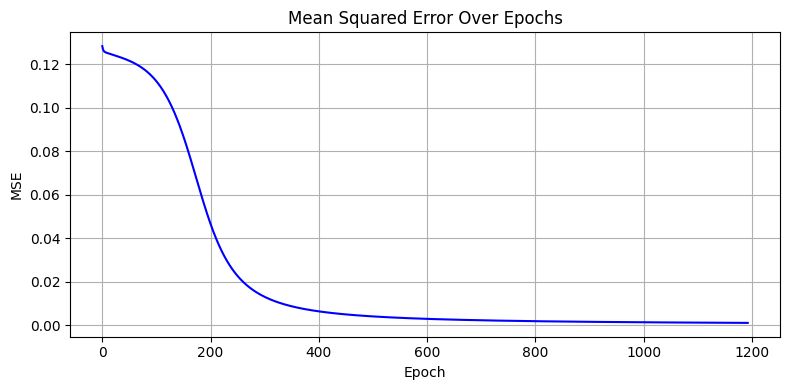

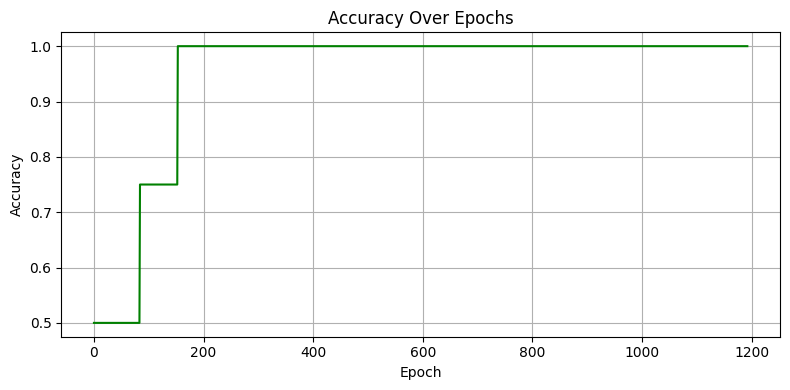

In [45]:
df = history.df

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

On voit bien une courbe représentant la minimization de l'erreur quadratique moyenne, ainsi que l'augmetation de la précision de la classification.

Reste à montrer les droites de décision avec les données.

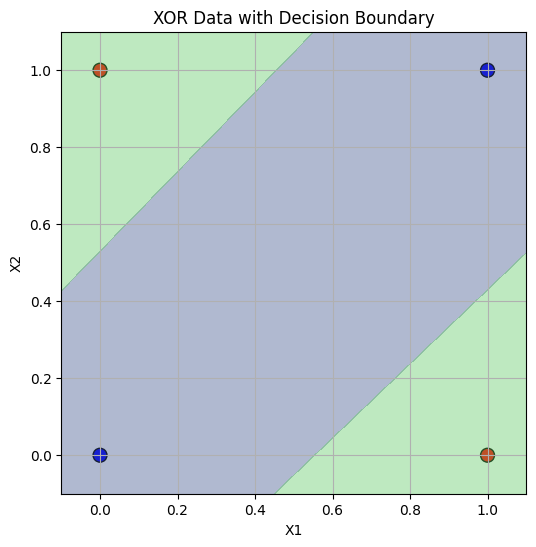

In [46]:
plt.figure(figsize=(6, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr', s=100, edgecolors='k')
# Create grid for decision boundary
x_min, x_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1
y_min, y_max = x_train[:, 1].min() - 0.1, x_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# Predict for each point in the grid
Z = np.array([model.forward([x, y]) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='viridis', alpha=0.4)

# Labels and grid
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR Data with Decision Boundary")
plt.grid(True)
plt.show()

Lors d'une convergeance réussie, on voit bien les deux droites de décision.

Il y a deux cas de figures possibles, correspondants à deux minimas équivalents:
- Les deux droites ont une pente **positives**, et la classe de (0,0) et (1,1) "coupe" la classe de (1,0) et (0,1) en deux
- les deux droites ont une pente **négatives**, et la classe de (1,0) et (0,1) "coupe" la classe (0,0) et (1,1) en deux

## Classification à 2 classes non linéairement séparables

On a choisi un modèle avec 10 neurones sur la couche cachée afin de bien délimiter les données, même si théoriquement 3 suffisent pour trianguler le nuage de points.

In [49]:
model = Model([
    Layer(units=10, activation="sigmoid", input_size=2),
    Layer(units=1, activation="sigmoid"),
])

training_df = data_processing.load_dataframe_from_file("../datasets/table_4_12.csv")
x_train = np.array([x[1:] for x in training_df["inputs"]], dtype=float)
y_train = training_df["label"].to_numpy(dtype=float)
 # Je vous épargne l'output, on se limite au 5 premiers ;-)
print(f"x_train =\n {x_train[0:5]}")
print(f"y_train = {y_train[0:5]}")

x_train =
 [[-1.56  0.93]
 [ 1.43 -1.29]
 [ 1.03  0.59]
 [ 0.21 -0.04]
 [-0.62  1.25]]
y_train = [0. 0. 1. 1. 0.]


In [50]:
history = model.fit(x_train, y_train, 0.5, 0.001, 2000)

for case in x_train[0:5]:
    answer = model.forward(case)
    print(f"Case: {case}, answer: {answer.round()}")

Training complete after 170 epochs.
Case: [-1.56  0.93], answer: [0.]
Case: [ 1.43 -1.29], answer: [0.]
Case: [1.03 0.59], answer: [1.]
Case: [ 0.21 -0.04], answer: [1.]
Case: [-0.62  1.25], answer: [0.]


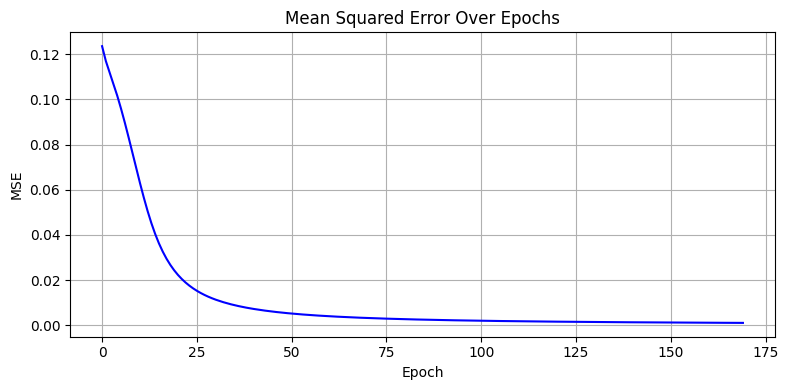

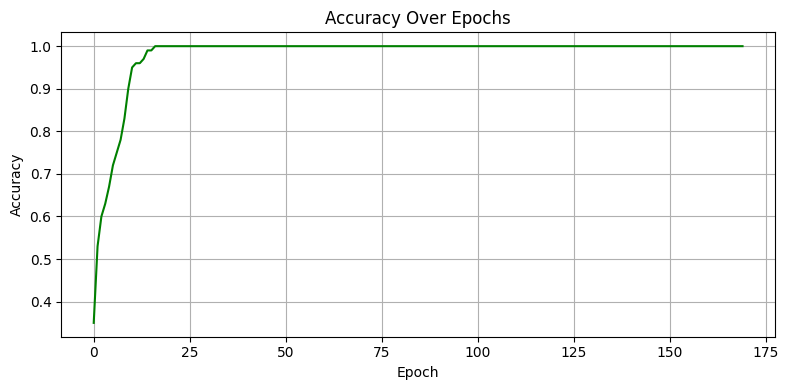

In [51]:
df = history.df

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['mse'], label='MSE', color='blue')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Mean Squared Error Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['accuracy'], label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.grid(True)
plt.tight_layout()
plt.show()

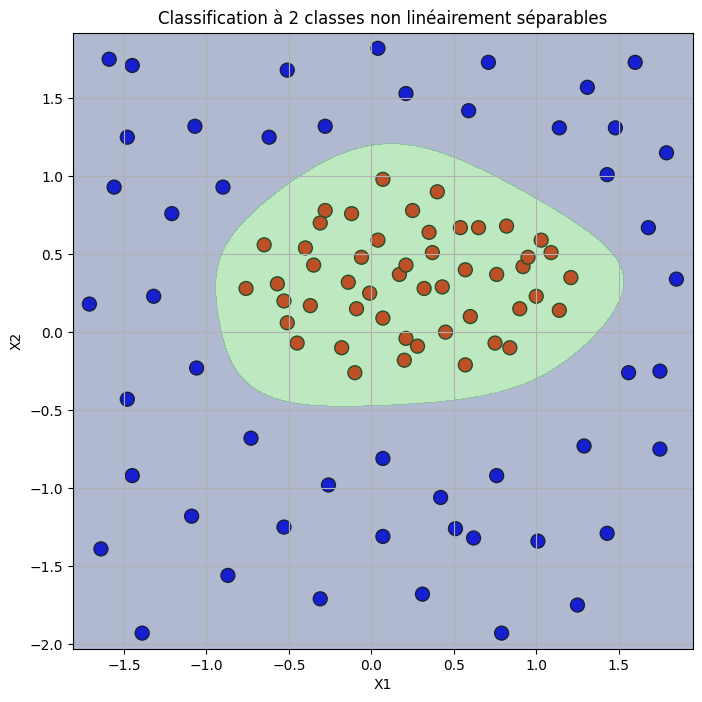

In [55]:
plt.figure(figsize=(8, 8))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr', s=100, edgecolors='k')
# Create grid for decision boundary
x_min, x_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1
y_min, y_max = x_train[:, 1].min() - 0.1, x_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# Predict for each point in the grid
Z = np.array([model.forward([x, y]) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='viridis', alpha=0.4)

# Labels and grid
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Classification à 2 classes non linéairement séparables")
plt.grid(True)
plt.show()

## Classification à 3 classes non linéairement séparables

In [ ]:
# TODO

## Régression non-linéaire

In [ ]:
# TODO